In [1]:
import sys, os
from time import time
if '../' not in sys.path:
    sys.path.insert(0, '../')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from modules.paths import Experiment
from modules.classification import CellClassifier
from modules.figure_settings import *

from matplotlib.colors import ListedColormap

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
def get_stack_df(stack):
    dfs = []
    for layer in stack:
        if layer.include:
            dfs.append(layer.df)
    df = pd.concat(dfs)
    df = df[df.near_furrow]
    return df

def show_layer(layer, classifier):
    labels = classifier(layer.df)
    xy = layer.df[['centroid_x', 'centroid_y']].values
    fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
    _ = layer.get_channel('r').show(segments=False, ax=ax0, cmap=plt.cm.Greys)
    ax1.scatter(*xy.T, c=labels, cmap=classifier.cmap, lw=0)
    ax1.invert_yaxis()
    _ = ax1.axis('off')

In [3]:
# Load paths to each set of experiments
control_path = '/Volumes/bernasek_t5/pnt_manuscript/microscopy/yan_clones/control/slices/w-eyFLP_PntGFP_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A'
mutant_path = '/Volumes/bernasek_t5/pnt_manuscript/microscopy/yan_clones/perturbation/slices/w-eyFLP_PntGFP_YanE833_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A'
control = Experiment(control_path)
mutant = Experiment(mutant_path)

# Define thresholds on a per-stack basis

In [114]:
' '.join([str(x) for x in control.disc_names])

'28 29 30 31 55 56'

In [140]:
disc_id = 56
stack = control[control.disc_names.index(disc_id)]
df = get_stack_df(stack)
stack.df.layer.unique()

array([0, 1])

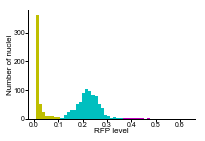

In [144]:
# create cell genotype classifier (operates on cells)
groups = {0:0, 1:0, 2:1, 3:1, 4:1, 5:1, 6:1, 7:2, 8:2}
classifier = CellClassifier.from_cells(df, classify_on='r', n=len(groups), groups=groups, cmap=None, log=False)
fig, ax = plt.subplots(figsize=(3, 2))
_ = classifier.show(ax=ax)

#fig.savefig('../graphics/cell_classification.pdf', dpi=300, format='pdf', transparent=True, rasterized=True)

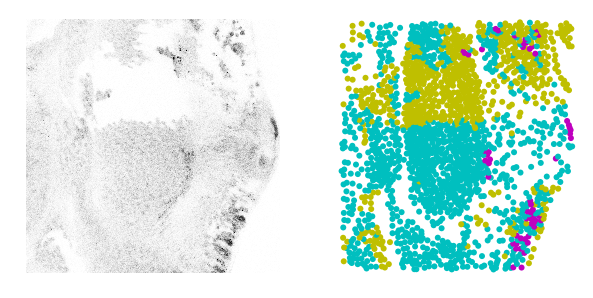

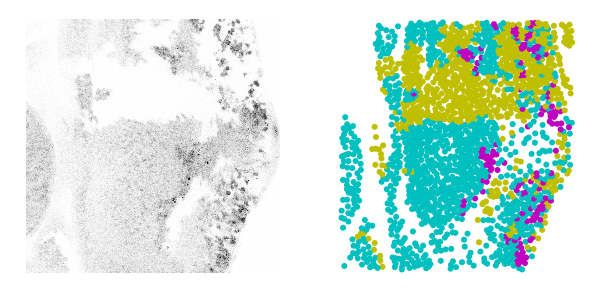

In [145]:
for layer in stack:
    show_layer(layer, classifier)

In [146]:
classifier.save(stack.path, image=True)

In [ ]:
# mutant 47 is a good example of clear separation